**06 : Model Evaluation and deployment**

Importing required modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

import os
import pickle
import datetime
import warnings

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Directory variables

In [3]:
data_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\data"
data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\selected_features_and_labels.pkl"
model_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\models\final_model.pkl"
output_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs"
transformer_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\transformers"

Loading data, model and transformers

In [4]:
def load_data(data_dir, file_name, date_columns=[]):
    file_path = os.path.join(data_dir, file_name)
    return pd.read_csv(file_path, parse_dates=date_columns)
new_data = load_data(data_dir, "dengue_features_test.csv", date_columns=["week_start_date"])

In [5]:
with open(data_path, "rb") as file:
    data = pickle.load(file)

In [6]:
with open(model_path, "rb") as file:
    model = pickle.load(file)

In [7]:
transformer_path = os.path.join(transformer_dir, "le.pkl")
with open(transformer_path, "rb") as file:
    le = pickle.load(file)

In [8]:
selector_path = os.path.join(transformer_dir, "selector.pkl")
with open(selector_path, "rb") as file:
    selector = pickle.load(file)

In [9]:
scaler_path = os.path.join(transformer_dir, "scaler.pkl")
with open(scaler_path, "rb") as file:
    scaler = pickle.load(file)

In [10]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,total_cases
0,1.0,4.0,0.0,1990.0,18.0,-0.016536,-0.045015,0.110036,-0.082612,-0.744185,-0.943302,-1.214591,-1.387852,-0.329611,-1.566752,-0.744185,-0.368641,-1.291053,-0.300128,-1.448836,-1.484469,-0.272887,4.0
1,1.0,5.0,0.0,1990.0,19.0,0.377020,0.301500,-0.478241,-0.436839,-0.314551,-0.487879,-0.700195,-0.676998,-0.111301,-0.523304,-0.314551,-0.651463,-0.492902,-0.749960,-0.388845,-0.047147,-0.800602,5.0
2,1.0,5.0,0.0,1990.0,20.0,-0.792355,0.568155,-0.567387,-0.187652,0.097705,-0.071461,-0.367098,-0.919344,0.354113,0.354093,0.097705,-0.738630,-0.492902,-0.645358,-0.133716,0.351279,0.798169,4.0
3,1.0,5.0,0.0,1990.0,21.0,0.034186,1.163593,0.537103,0.709611,-0.616682,0.081599,-0.090599,-0.400195,0.187881,0.075074,-0.616682,-0.584496,0.085830,-0.401578,0.476215,0.685422,-1.191951,3.0
4,1.0,5.0,0.0,1990.0,22.0,0.592251,1.300171,0.861593,0.847845,-0.967240,0.483642,0.267015,-0.152622,0.471071,0.096439,-0.967240,-0.025532,1.544761,0.952789,1.553328,1.088514,-1.032905,6.0


In [11]:
model

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=500)

Features and Labels

In [12]:
X = data.drop(columns=["total_cases"])
y = data.total_cases
X.shape, y.shape

((1114, 22), (1114,))

Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Training and making predictions

In [14]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=500)

In [15]:
y_preds = model.predict(X_test)

Evaluation 

In [16]:
def metrics(y_true,y_preds):
    def precision(x):
        return np.round(x,2)
    mse = precision(mean_squared_error(y_test, y_preds))
    rmse = precision(np.sqrt(mse))
    mae = precision(mean_absolute_error(y_test, y_preds))
    r2 = precision(r2_score(y_test, y_preds))
    print(f"MSE:{mse} | RMSE:{rmse} | MAE:{mae} | r2:{r2}")

In [17]:
metrics(y_test,y_preds)

MSE:278.96 | RMSE:16.7 | MAE:10.32 | r2:0.64


- Residual Plot: Plotting the residuals (the differences between predicted and actual values) helps you assess whether your model is making systematic errors

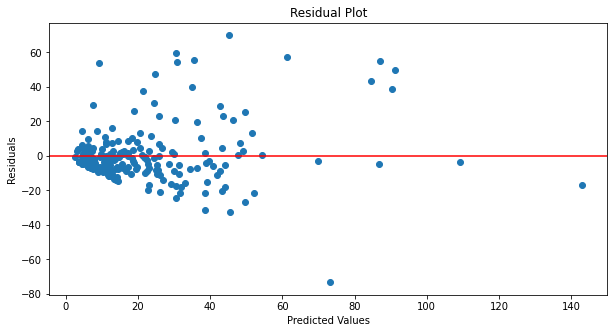

In [18]:
plt.figure(figsize=(10, 5))
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Distribution Plot : Visualize the distribution of predicted values compared to actual values.

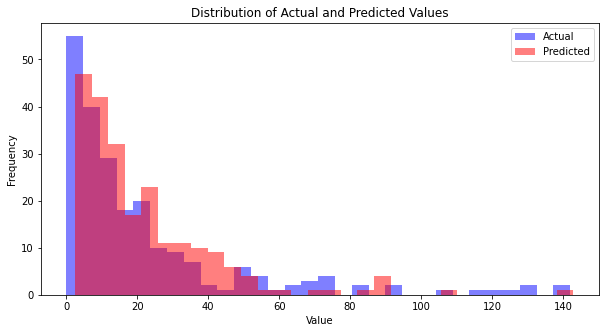

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='b')
plt.hist(y_preds, bins=30, alpha=0.5, label='Predicted', color='r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Actual and Predicted Values')
plt.show()

Feature Importance : If your model allows for feature importance analysis (e.g., Random Forest), visualize the importance scores of individual features.

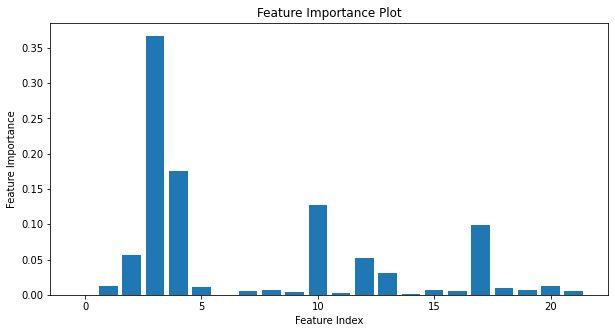

In [20]:
plt.figure(figsize=(10, 5))
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importance Plot')
    plt.show()

New data processing 

In [47]:
def load_data(data_dir, file_name, date_columns=[]):
    file_path = os.path.join(data_dir, file_name)
    return pd.read_csv(file_path, parse_dates=date_columns)

In [48]:
new_data = load_data(data_dir, "dengue_features_test.csv", date_columns=["week_start_date"])

In [49]:
new_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [50]:
new_data.shape

(416, 24)

In [51]:
new_data2 = new_data.copy()

In [52]:
def process_test(data,encoder = le, selector = selector,scaler = scaler):

    def handle_null_values(data):
        data.fillna(data.mean(), inplace=True)
        return data

    def date_extraction(data):
        data = handle_null_values(data)
        data.insert(1,"day",data.week_start_date.dt.day)
        data.insert(2,"month",data.week_start_date.dt.month)
        data.insert(3,"day_of_week",data.week_start_date.dt.day_of_week)
        data.drop(columns=["week_start_date"],inplace=True)
        return data

    def scale_data(data):
        data = date_extraction(data)
        scaling_columns = data.iloc[:, 6:].columns
        data[scaling_columns] = scaler.transform(data[scaling_columns])
        return data

    def encoding(data):
        data = scale_data(data)
        cols = data.select_dtypes("O").columns
        data[cols[0]] = le.transform(data[cols[0]])
        return data

    def feature_selection(data):
        data = encoding(data)
        data = selector.transform(data)
        return data
    
    return feature_selection(data)

In [53]:
processed_new_data = process_test(new_data2)

In [65]:
processed_new_data_path = os.path.join(output_dir, "processed_new_data.pkl")
def save_transformed_data(data, file_path):
    with open(file_path, "wb") as file:
        pickle.dump(processed_new_data, file)
        print("Submission saved successfully")

save_transformed_data(processed_new_data, processed_new_data_path)

Submission saved successfully


Predictions on new data

In [54]:
y_preds = model.predict(processed_new_data)

In [55]:
y_preds[:10]

array([ 7.16581114,  7.54423659,  5.98774419,  8.81539574,  7.45941026,
       12.75091547, 10.29697799,  7.67894617, 11.52081264, 10.90110692])

Submission 

In [56]:
X_submission = new_data[["city","year","weekofyear"]]

In [58]:
X_submission.head()

,city,year,weekofyear
0,sj,2008,18
1,sj,2008,19
2,sj,2008,20
3,sj,2008,21
4,sj,2008,22


In [59]:
submission = pd.concat([X_submission,pd.Series(y_preds.astype('int64'),name="total_cases")],axis=1)

In [60]:
submission.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,7
1,sj,2008,19,7
2,sj,2008,20,5
3,sj,2008,21,8
4,sj,2008,22,7


In [61]:
submission.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [62]:
submission_data_path = os.path.join(output_dir, "submission.pkl")
def save_transformed_data(data, file_path):
    with open(file_path, "wb") as file:
        pickle.dump(data, file)
        print("Submission saved successfully")

save_transformed_data(submission, submission_data_path)

Submission saved successfully


In [63]:
csv_file_path = os.path.join(output_dir, "submission.csv")
submission.to_csv(csv_file_path, index=False) 